Importing the libraries

In [499]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Load the dataset

In [500]:
dataset = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


House Price Distribution

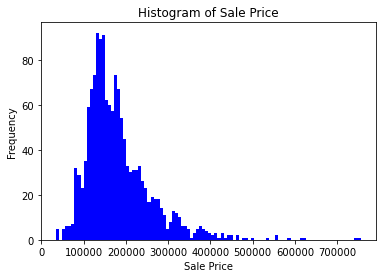

In [501]:
#Plot the distribution of the house prices on a histogram
plt.hist(dataset['SalePrice'], color='b', bins=100) #Using 100 binsfor more detail

# Creating the x and axis titles, as well as the title of the graph 
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Histogram of Sale Price')

# Plot the graph
plt.show()

Distribution of the rest of the numerical values

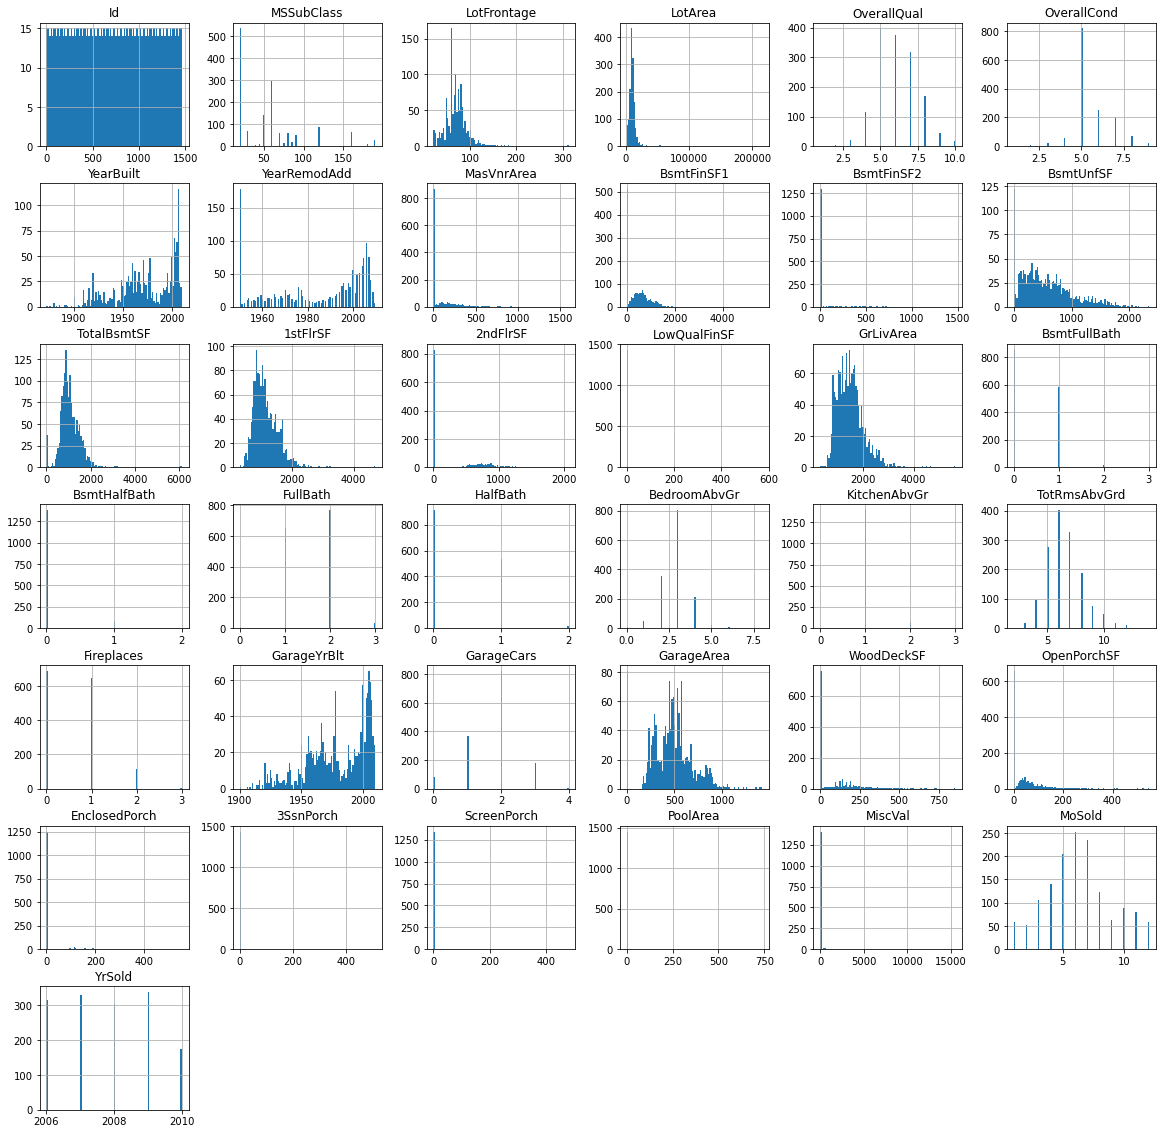

In [502]:
# Only pick numerical metrics except the house prices because we already plotted it above
num_df = dataset.drop('SalePrice', axis=1) 
num_df = num_df.select_dtypes(include = ['float64', 'int64']) 

# Plot the distribtution of all the numerical fields
num_df.hist(figsize=(20, 20), bins=100); #Here we have to resize the plots because there were too many


Preprocessing

In [503]:
# Combine train and test datasets
combined_data = pd.concat([dataset.drop('SalePrice', axis=1), test_df], axis=0)

# Apply one-hot encoding to the combined dataset so that we do not have input problems later
combined_data_encoded = pd.get_dummies(combined_data)

# Determine the index where the training data ends
train_end_index = len(dataset)

# Split the combined dataset back into training and test datasets
train_dataset = combined_data_encoded[:train_end_index]
train_dataset = train_dataset.join(dataset['SalePrice'])
test_df = combined_data_encoded[train_end_index:]

# Remove null values
train_dataset.dropna(inplace=True)
test_df.dropna(inplace=True)

#Remove the ids from the test set and save them
ids = test_df.pop('Id')
#Drop the first column because we will not need the id for the prediction
train_dataset = train_dataset.drop('Id', axis=1) #Axis = 1 to drop a column and not a row

train_dataset.head(5)

<ipython-input-503-1841c3f1e1ba>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.dropna(inplace=True)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,0,0,0,0,1,0,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,0,0,0,0,1,0,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,0,0,0,0,1,0,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,1,0,0,0,0,0,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,0,0,0,0,1,0,250000


In [504]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer

# # Splitting the independent varaiables from the dependent variable (House Prices)
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values

# #This replaces all null values by the most frequence value appearing on the column
# imputer = SimpleImputer(strategy='most_frequent')
# X = imputer.fit_transform(X)

# #One hot incoding on non-numerical values
# string_df = dataset.select_dtypes(exclude= ['float64', 'int64']).columns
# # Get the indices (locations) of the columns to be one-hot encoded
# column_indices = [dataset.columns.get_loc(col) for col in string_df]
# print(column_indices)
# ct = ColumnTransformer(
#     transformers=[('encoder', OneHotEncoder(), [1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 34, 38, 39, 40, 41, 52, 54, 56, 57, 59, 62, 63])])
# X = np.array(ct.fit_transform(X))


Split the dataset into training and testing sets

In [505]:
from sklearn.model_selection import train_test_split
# # Splitting the independent varaiables from the dependent variable (House Prices)
X = train_dataset.iloc[:, :-1].values
y = train_dataset.iloc[:, -1].values
# Using 80% of the data for training and 20% for testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Figuring out the number of estimators to use

In [506]:
from sklearn.ensemble import RandomForestRegressor

oob_errors = []

# Define a range of estimator values to try
n_estimators_range = [10, 50, 100, 200]

#For each estimator in those given above we train the model and 
for n_estimators in n_estimators_range:
    # Train a random regression model with the given estimator keeping in consideration the oob
    # For each data point, the OOB error is computed by making a prediction 
    # using only the trees that were not trained on that data point.
    rf = RandomForestRegressor(n_estimators=n_estimators, oob_score=True, random_state=0)
    rf.fit(X_train, y_train)  

    # We calculate the out of bag error of each model and append it into a list
    oob_error = 1 - rf.oob_score_
    oob_errors.append(oob_error)

# Choose the number of estimators with the lowest OOB error
best_n_estimator = n_estimators_range[oob_errors.index(min(oob_errors))]

c:\Users\Androw\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Training the random forest regression model on the dataset

In [507]:
regressor = RandomForestRegressor(n_estimators = best_n_estimator, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

Evaluating the model performance

In [508]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test)
# Here we use the R^2 score to know how well our regression model fits the data
# It mesures the varaibility of the predictions compared to actual values: 1-(Sum(ypred-y)^2/n)
r2_score(y_test, y_pred)

0.8229330972075009

Applying model on the test set

In [511]:
test_pred = regressor.predict(test_df)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': test_pred.squeeze()})
output.head(10)

,Id,SalePrice
0,1461,128093.415
1,1462,153973.395
2,1463,191239.100
3,1464,185486.515
4,1465,212566.930
5,1466,181283.240
7,1468,174341.850
8,1469,186272.455
9,1470,119619.295
10,1471,213605.865
